In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, StackingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
jfk_df = pd.read_csv("JFK-Flights.csv")

In [3]:
# Drop rows with missing target values
jfk_df = jfk_df.dropna(subset=["DEP_DELAY"])

In [4]:
# Define target and reduced feature list based on importance
target = "DEP_DELAY"
top_features = ["CRS_DEP_M", "DEP_TIME_M", "CRS_ARR_M", "sch_dep", "DAY_OF_MONTH"]
X = jfk_df[top_features]
y = jfk_df[target]

In [5]:
# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Define base models
base_models = [
    ("lr", LinearRegression()),
    ("svm", SVR()),
    ("gb", GradientBoostingRegressor(random_state=42)),
    ("nn", MLPRegressor(max_iter=500, random_state=42))
]

In [8]:
# Define meta model for the ensemble
meta_model = RandomForestRegressor(random_state=42)

In [9]:
# Create stacking ensemble
ensemble = StackingRegressor(estimators=base_models, final_estimator=meta_model)

In [10]:
# Train the ensemble model
ensemble.fit(X_train, y_train)

StackingRegressor(estimators=[('lr', LinearRegression()), ('svm', SVR()),
                              ('gb',
                               GradientBoostingRegressor(random_state=42)),
                              ('nn',
                               MLPRegressor(max_iter=500, random_state=42))],
                  final_estimator=RandomForestRegressor(random_state=42))

In [11]:
# Make predictions
y_pred = ensemble.predict(X_test)

In [12]:
# Evaluate performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")

Root Mean Squared Error: 6.34
Mean Absolute Error: 1.76
R^2 Score: 0.97


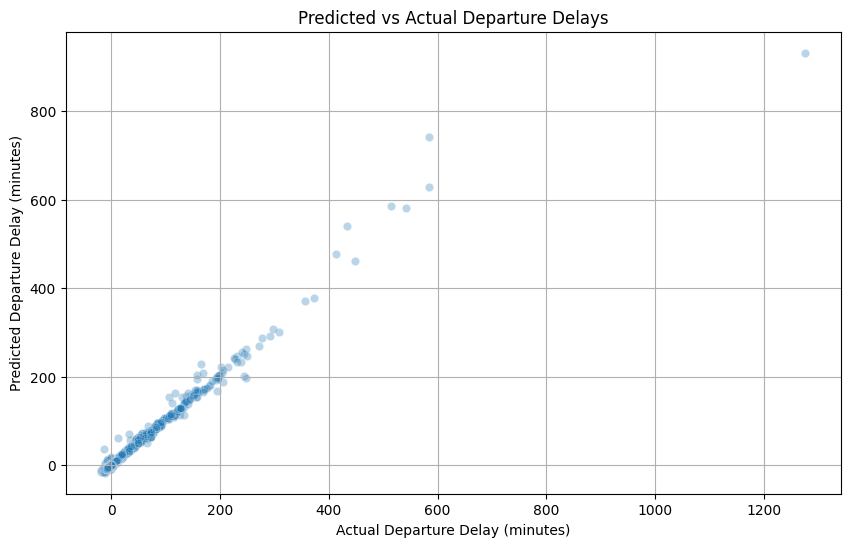

In [13]:
# Plot predicted vs actual
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
plt.xlabel("Actual Departure Delay (minutes)")
plt.ylabel("Predicted Departure Delay (minutes)")
plt.title("Predicted vs Actual Departure Delays")
plt.grid(True)
plt.show()

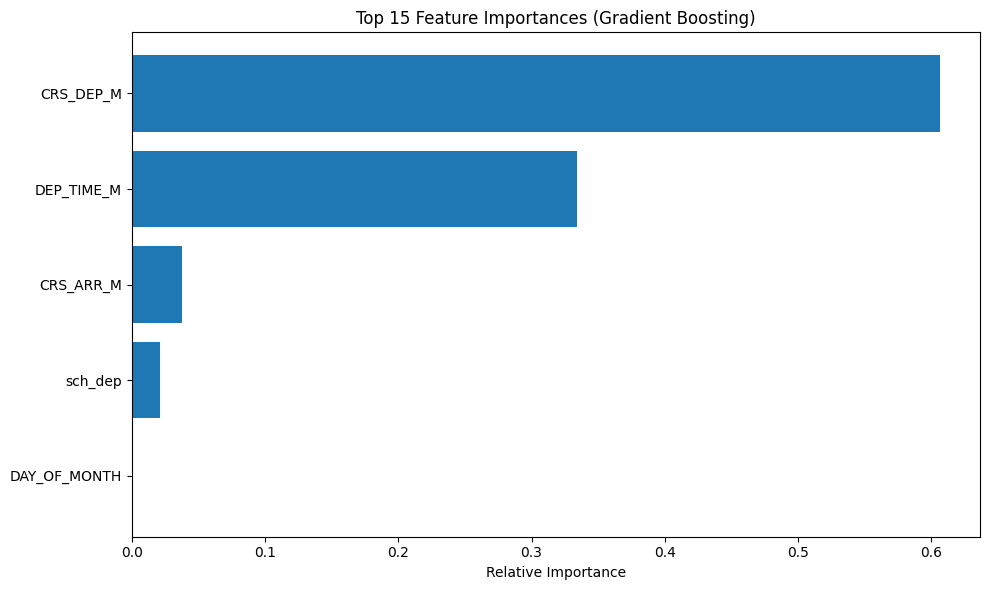

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Access the Gradient Boosting model directly
gb_model = ensemble.named_estimators_['gb']

# Get feature importances
importances = gb_model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[-15:]  # top 15 features

# Plot
plt.figure(figsize=(10, 6))
plt.title("Top 15 Feature Importances (Gradient Boosting)")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.show()
